# Importing  library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

# Loading Dataset

In [2]:
df1 = pd.read_excel("Data_Train.xlsx")        #Training dataset
df2 = pd.read_excel("Test_set.xlsx")          #Testing dataset

In [3]:
#Training set
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Testing set
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Exploratory Data Analysis

In [5]:
df1.shape , df2.shape

((10683, 11), (2671, 10))

# Checking for missing values

In [6]:
# for training data
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

only two columns have one  missing value. so we are going to drop them.

In [7]:
#for training data
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Testing set does not have any missing values

# Checking information about data

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- All the columns except Price are of object type.
- Although Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops are of object type but acctually we need to convert them to there right data tpye in feature engineering process 


# Dropping missing values from the data

In [9]:
df1.dropna(inplace=True)

In [10]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df1.shape

(10682, 11)

Now data set don not have any missing values.

# Checking for duplicate values

In [12]:
df1.duplicated().sum(),df2.duplicated().sum()

(220, 26)

- Training Data set have 220 duplicate values and,
- Testing Data set have 26 duplicate values so we are going to drop them form our data.

In [13]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [14]:
df1.shape,df2.shape

((10462, 11), (2645, 10))

we dropped duplicate values from the data.

# Checking how our data looks mathematically

In [15]:
df1.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


# Feature Engineering

Converting Date_of_Journey column into date time index 

In [16]:
df1["Date_of_Journey"] = pd.to_datetime(df1["Date_of_Journey"])
df2["Date_of_Journey"] = pd.to_datetime(df2["Date_of_Journey"])

Now we are goint to extract Day,Month,and Year saperately from the Date_of_Journey column.

In [17]:
df1["Day"] = df1["Date_of_Journey"].dt.day
df1["Month"] = df1["Date_of_Journey"].dt.month
df1["Year"] = df1["Date_of_Journey"].dt.year
df2["Day"] = df2["Date_of_Journey"].dt.day
df2["Month"] = df2["Date_of_Journey"].dt.month
df2["Year"] = df2["Date_of_Journey"].dt.year

In [18]:
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
df2.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,2019


here we added 3 more columns and we can remove Date_of_Journey column from our dataset.

In [20]:
df1.drop(columns=(["Date_of_Journey"]),axis=1,inplace=True)
df2.drop(columns=(["Date_of_Journey"]),axis=1,inplace=True)

Cleaning the Arrival_Time column since column has some unwanted values

In [21]:
df1["Arrival_Time"] = df1['Arrival_Time'].apply(lambda x: x[0:5])
df2["Arrival_Time"] = df2['Arrival_Time'].apply(lambda x: x[0:5])

# Handeling Total_Stops colum

In [22]:
df1["Total_Stops"] = df1['Total_Stops'].apply(lambda x: x[0:2])
df2["Total_Stops"] = df2['Total_Stops'].apply(lambda x: x[0:2])
df1["Total_Stops"] = np.where(df1["Total_Stops"] == "no" , 0 ,df1["Total_Stops"])
df2["Total_Stops"] = np.where(df2["Total_Stops"] == "no" , 0 ,df2["Total_Stops"])
df1["Total_Stops"]=df1["Total_Stops"].astype('int32')
df2["Total_Stops"]=df2["Total_Stops"].astype('int32')

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  int32 
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  int64 
 11  Month            10462 non-null  int64 
 12  Year             10462 non-null  int64 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.1+ MB


In [24]:
df1.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019


In [25]:
df1["Dep_Time"] = pd.to_datetime(df1["Dep_Time"])
df2["Dep_Time"] = pd.to_datetime(df2["Dep_Time"])
df1["Arrival_Time"] = pd.to_datetime(df1["Arrival_Time"])
df2["Arrival_Time"] = pd.to_datetime(df2["Arrival_Time"])

In [26]:
df1["Dep_Time"] = df1["Dep_Time"].dt.hour
df2["Dep_Time"] = df2["Dep_Time"].dt.hour
df1["Arrival_Time"] = df1["Arrival_Time"].dt.hour
df2["Arrival_Time"] = df2["Arrival_Time"].dt.hour

In [27]:
df1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7h 25m,2,No info,7662,5,1,2019


In [28]:
df2.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17,4,10h 55m,1,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,6,10,4h,1,No info,5,12,2019


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  int64 
 5   Arrival_Time     10462 non-null  int64 
 6   Duration         10462 non-null  object
 7   Total_Stops      10462 non-null  int32 
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  int64 
 11  Month            10462 non-null  int64 
 12  Year             10462 non-null  int64 
dtypes: int32(1), int64(6), object(6)
memory usage: 1.1+ MB


In [30]:
df1.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7h 25m,2,No info,7662,5,1,2019


# Handling Duration column

In [31]:
df1["Duration"]=df1["Duration"].str.extract('(\d+)')
df2["Duration"]=df2["Duration"].str.extract('(\d+)')

df1["Duration"]=df1["Duration"].astype('int32')
df2["Duration"]=df2["Duration"].astype('int32')

In [32]:
df2["Duration"].unique()

array([10,  4, 23, 13,  2, 18, 15,  5,  6, 28,  9, 17, 12, 14, 11, 25, 19,
        7,  3,  1, 27, 26,  8, 21, 16, 22, 33, 24, 38, 20, 35, 31, 34, 29,
       30, 37, 36, 39, 32, 40])

In [33]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7,2,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19,2,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5,1,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21,4,1,No info,13302,3,1,2019


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  int64 
 5   Arrival_Time     10462 non-null  int64 
 6   Duration         10462 non-null  int32 
 7   Total_Stops      10462 non-null  int32 
 8   Additional_Info  10462 non-null  object
 9   Price            10462 non-null  int64 
 10  Day              10462 non-null  int64 
 11  Month            10462 non-null  int64 
 12  Year             10462 non-null  int64 
dtypes: int32(2), int64(6), object(5)
memory usage: 1.0+ MB


In [35]:
df1.shape

(10462, 13)

# Handling Route column

In [36]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,1,2,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13,7,2,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,4,19,2,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23,5,1,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21,4,1,No info,13302,3,1,2019


In [37]:
df1["Route1"]=df1["Route"].str.split().str[0]
df1["Route2"]=df1["Route"].str.split().str[2]
df1["Route3"]=df1["Route"].str.split().str[4]
df1["Route4"]=df1["Route"].str.split().str[6]
df1["Route5"]=df1["Route"].str.split().str[8]

In [38]:
df2["Route1"]=df2["Route"].str.split().str[0]
df2["Route2"]=df2["Route"].str.split().str[2]
df2["Route3"]=df2["Route"].str.split().str[4]
df2["Route4"]=df2["Route"].str.split().str[6]
df2["Route5"]=df2["Route"].str.split().str[8]

In [39]:
df1['Route1'].fillna('None',inplace=True)
df1['Route2'].fillna('None',inplace=True)
df1['Route3'].fillna('None',inplace=True)
df1['Route4'].fillna('None',inplace=True)
df1['Route5'].fillna('None',inplace=True)

df2['Route1'].fillna('None',inplace=True)
df2['Route2'].fillna('None',inplace=True)
df2['Route3'].fillna('None',inplace=True)
df2['Route4'].fillna('None',inplace=True)
df2['Route5'].fillna('None',inplace=True)

In [40]:
df1.drop(['Route'],axis=1,inplace=True)
df2.drop(['Route'],axis=1,inplace=True)

In [41]:
df1.head(4)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22,1,2,0,No info,3897,24,3,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,5,13,7,2,No info,7662,5,1,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,9,4,19,2,No info,13882,6,9,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18,23,5,1,No info,6218,5,12,2019,CCU,NAG,BLR,None,None


# Exploratory Data Analysis.

In [42]:
df1.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22,1,2,0,No info,3897,24,3,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,5,13,7,2,No info,7662,5,1,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,9,4,19,2,No info,13882,6,9,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18,23,5,1,No info,6218,5,12,2019,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16,21,4,1,No info,13302,3,1,2019,BLR,NAG,DEL,None,None


In [43]:
df1["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

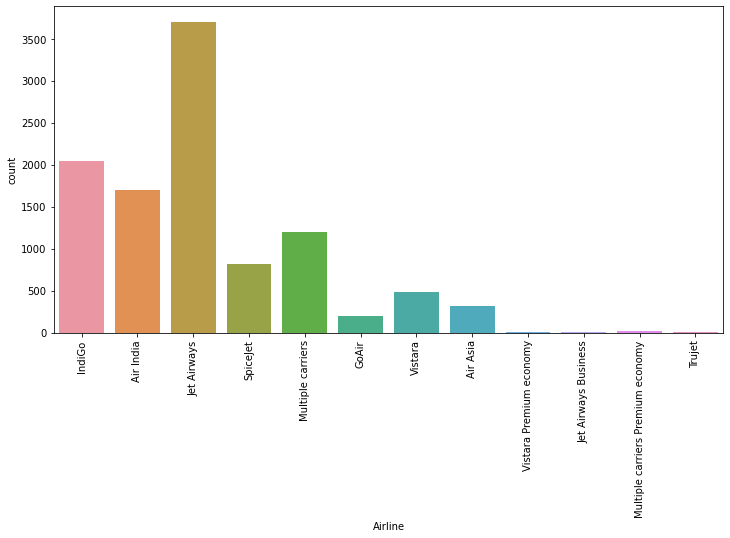

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Airline'])
plt.xticks(rotation=90)
plt.show()

- Maximum flights are of Jet Airways.
- Indigo comes after Jet Airways.

In [45]:
df1["Source"].value_counts()/10462*100

Delhi       41.531256
Kolkata     27.337029
Banglore    20.827758
Mumbai       6.662206
Chennai      3.641751
Name: Source, dtype: float64

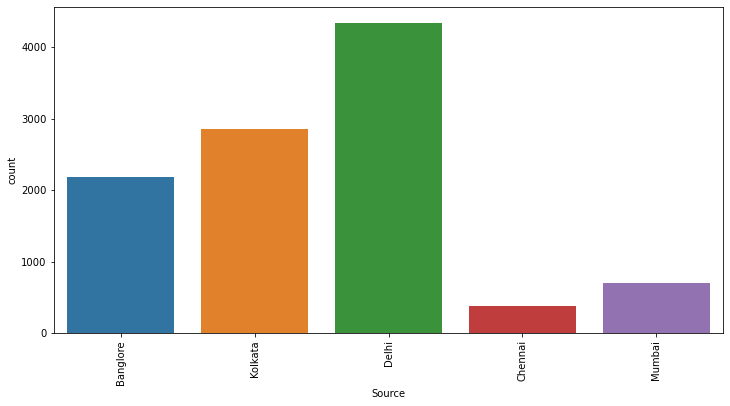

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Source'])
plt.xticks(rotation=90)
plt.show()

41 % of flights are flying from Delhi Base after delhi Kolkata has 27 % flights.

In [47]:
df1["Destination"].value_counts()/10462*100

Cochin       41.531256
Banglore     27.337029
Delhi        12.091378
New Delhi     8.736379
Hyderabad     6.662206
Kolkata       3.641751
Name: Destination, dtype: float64

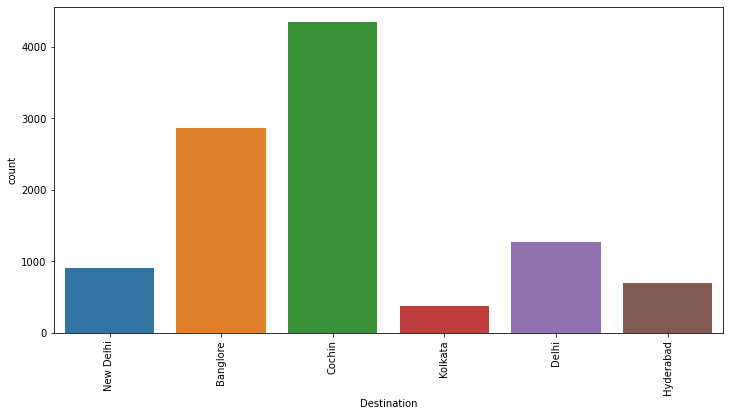

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Destination'])
plt.xticks(rotation=90)
plt.show()

41 % of flights have a destination base as a cochin after cochin 27 % of flights have Banglore.

In [49]:
df1["Total_Stops"].value_counts()/10462*100

1    53.766010
0    33.215446
2    12.597974
3     0.411011
4     0.009558
Name: Total_Stops, dtype: float64

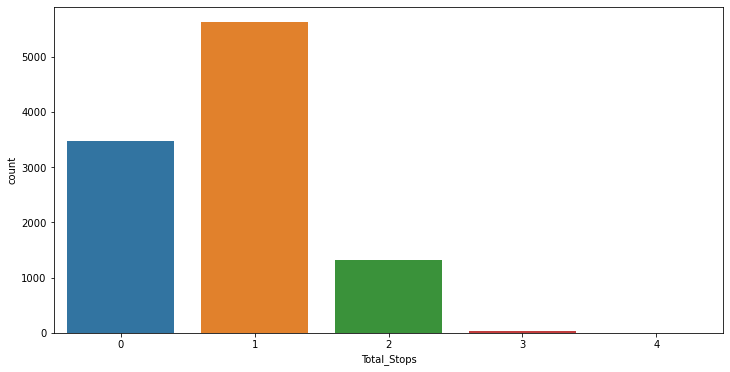

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(df1['Total_Stops'])
plt.xticks(rotation=0)
plt.show()

- 53 % of flights take only one stop before arriving at the destination.
- 33 % of flights are non stop flights.
- 12 % of flights take two stop before arriving at the destination.
- only 0.41 % of flights take 3 stop and .009 % takes 4 stop

In [51]:
a=(df1["Dep_Time"].value_counts()/10462*100).reset_index().sort_values(by="index")

<AxesSubplot:xlabel='index', ylabel='Dep_Time'>

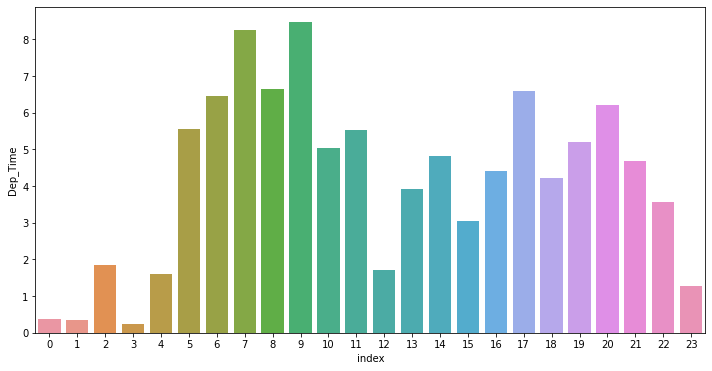

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(y=a["Dep_Time"],x=a["index"])

- maximum 8.4 % flights departed at 9 Am , 8.2 % flights departed at 7 Am

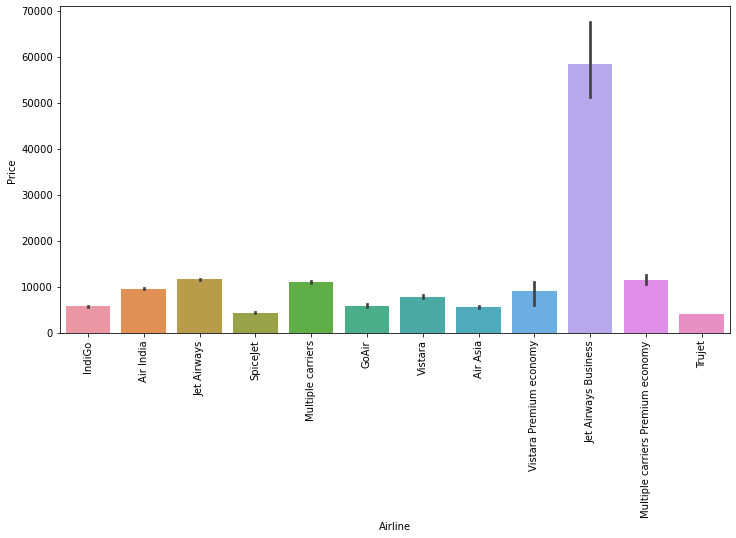

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(y=df1["Price"],x=df1["Airline"])
plt.xticks(rotation=90)
plt.show()

- from the above barplot we can observer that Jet AirWays has maximum flight price among all the flights.

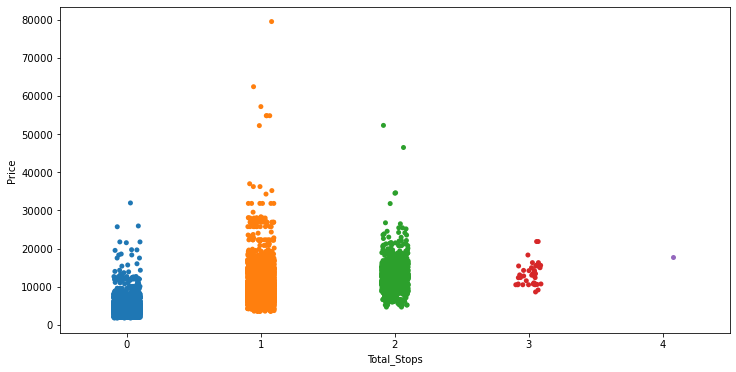

In [54]:
plt.figure(figsize=(12,6))
sns.stripplot(df1["Total_Stops"],df1["Price"])
plt.show()

- From the above strip plot we can see that maximum flight take one stop before reaching to the destination and price is maximum for the flight who takes one stop it seems to be arount 79000 approx.
- The maximum price for the flights who have no stop is around 35 k 
- The maximum price for the flights who takes 2 stop is around 55 k and the maximum price for the flights who have 3 stop is around 25 k 

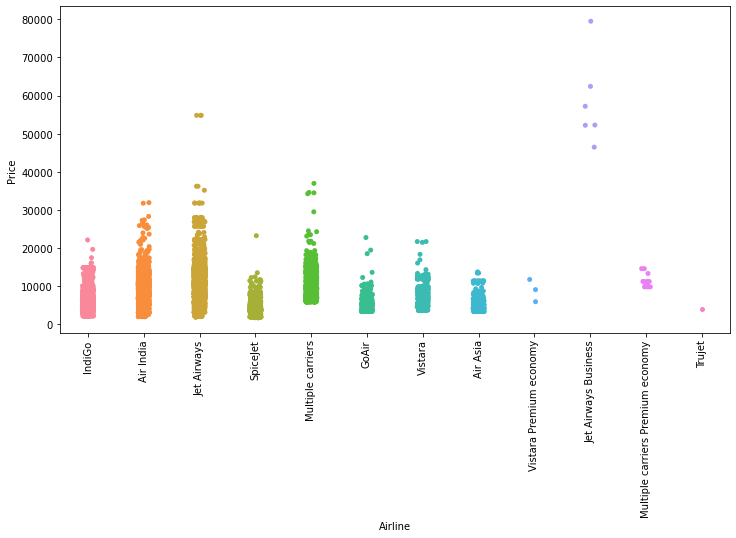

In [55]:
plt.figure(figsize=(12,6))
sns.stripplot(df1["Airline"],df1["Price"])
plt.xticks(rotation=90)
plt.show()

From the above strip plot we can clearely observed that 
- Maximum price of indigo is around 25 k
- Maximum price of Air India is around 33 k
- Maximum price of Jet AirWays is around 55 k
- Maximum price of Spice Jet,Go Air & Vistara is around 25 k
- Maximum price of Air Asia is around 20 k
- Maximum price of Jet AirWays Bussiness  is around 80 k


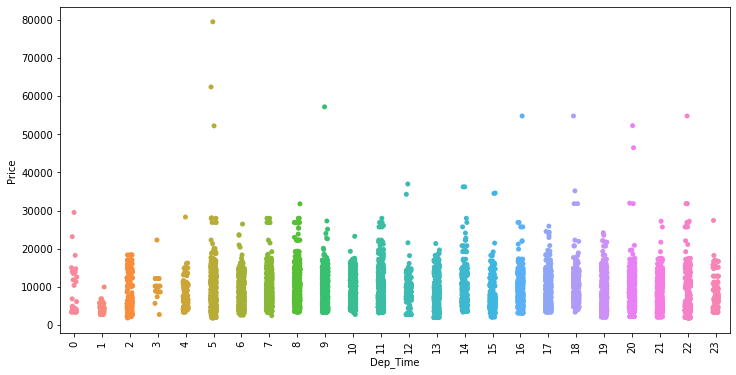

In [56]:
plt.figure(figsize=(12,6))
sns.stripplot(df1["Dep_Time"],df1["Price"])
plt.xticks(rotation=90)
plt.show()

- We can observed that the flights whose departure time is 1 Am has very low price as compare to others.
- Flight at 5 am has maximum price

<AxesSubplot:>

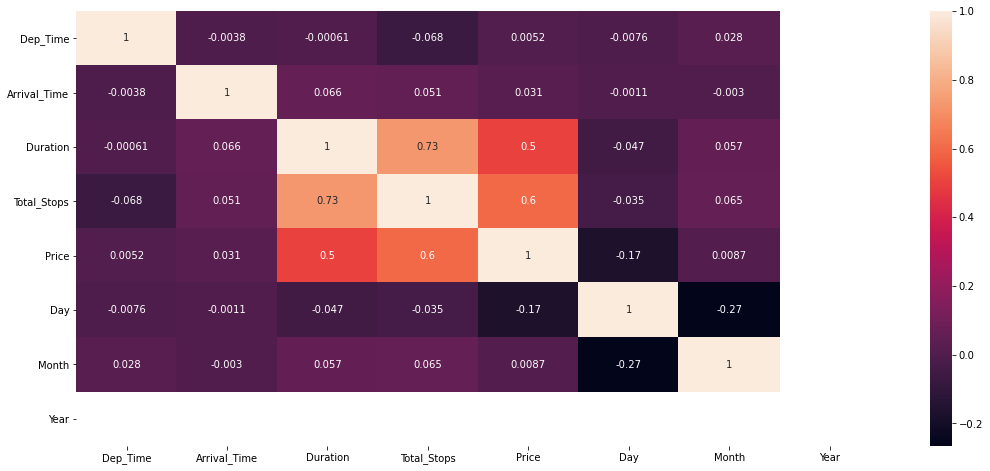

In [57]:
plt.figure(figsize=(18,8))
sns.heatmap(df1.corr(),annot=True)

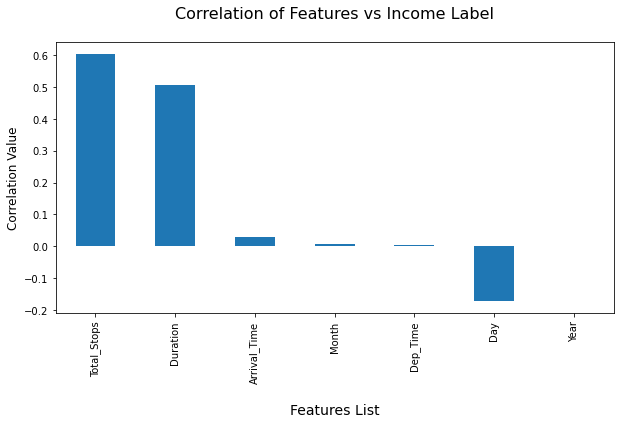

In [58]:
df_corr = df1.corr()
plt.figure(figsize=(10,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- Total stops column has 60 % posivite correlation with the target column.
- and Duration has 0.5 % posivite correlation with the target column.
- Since year column has only one value hence we can drop that column.



In [59]:
# Dropping Price Column
df1.drop("Year",axis=1,inplace=True)
df2.drop("Year",axis=1,inplace=True)

In [60]:
df1.head(1)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22,1,2,0,No info,3897,24,3,BLR,DEL,None,None,None


# Checking Distribution

In [61]:
num = []
cat=[]
for i in df1.columns:
    if df1[i].dtype == 'O':
        cat.append(i)   
    else:
        num.append(i)

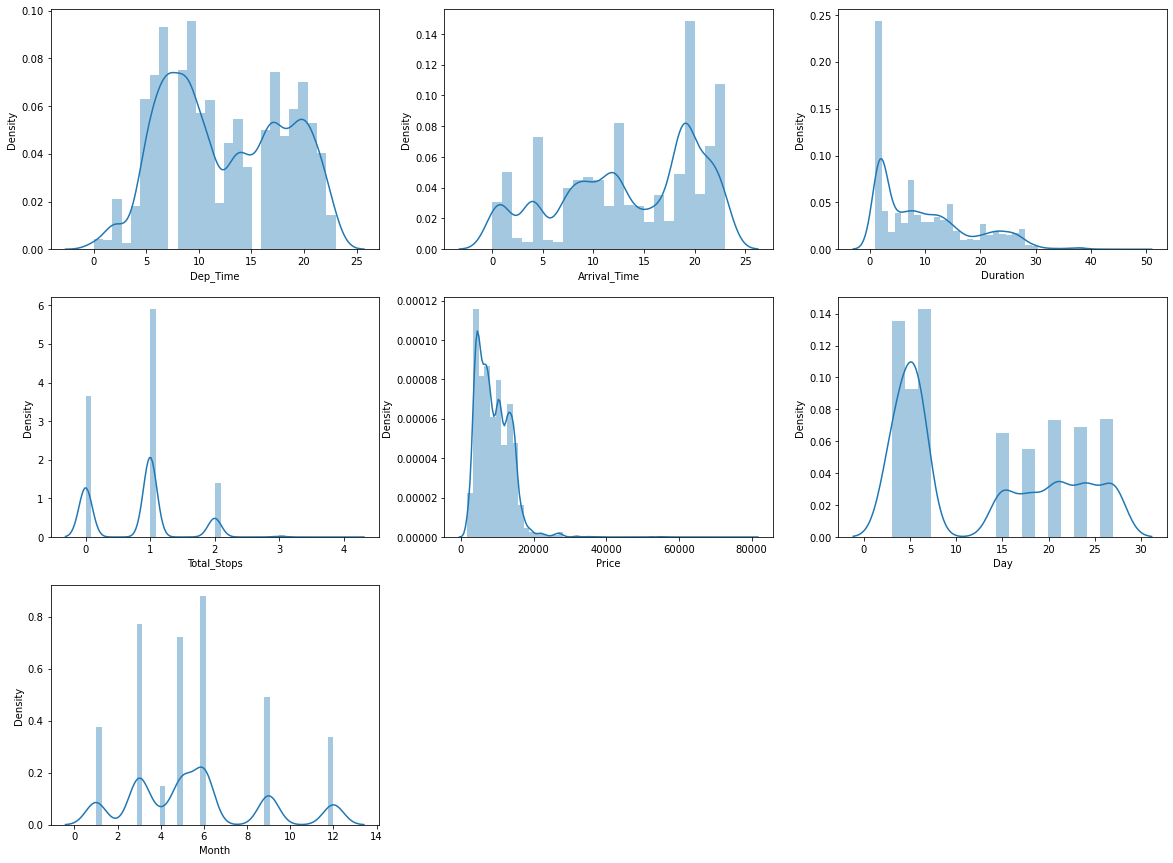

In [62]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.distplot(df1[j])
plt.show()    
    

# Checking for Outliers

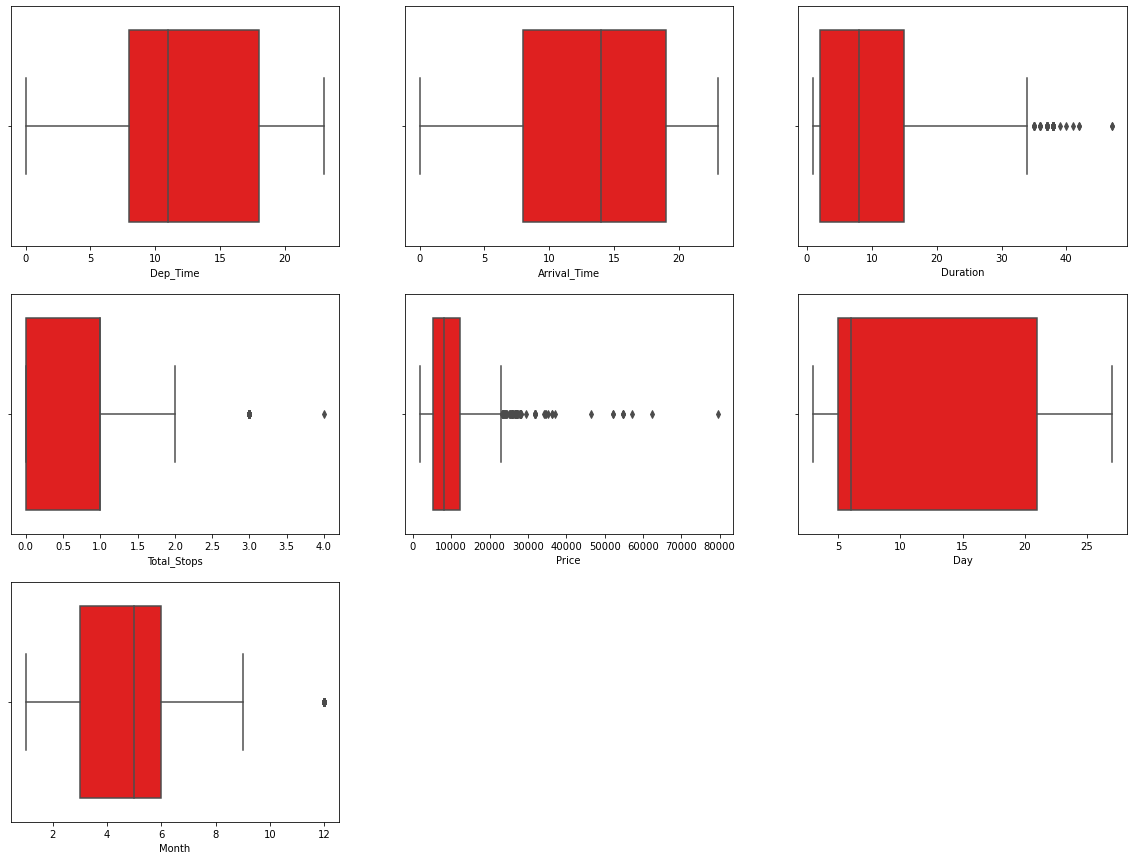

In [63]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(df1[j],color="r")
plt.show() 

In [64]:
for i in num:
    IQR = df1[i].quantile(.75) - df1[i].quantile(.25) 
    upper = df1[i].quantile(.75) + 1.5 * IQR
    lower = df1[i].quantile(.25) - 1.5 * IQR
    df1[i] = np.where(df1[i]>upper,upper,np.where(df1[i]<lower,lower,df1[i]))

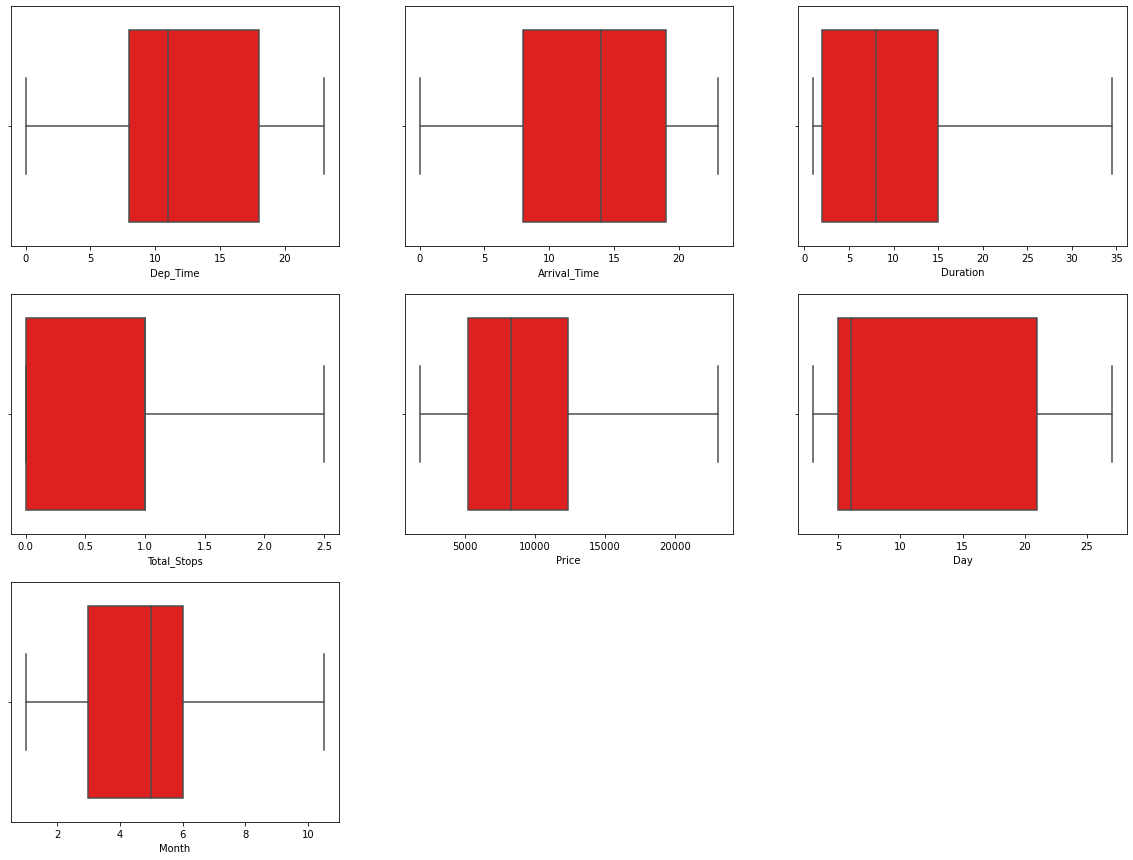

In [65]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(df1[j],color="r")
plt.show() 

we can clearly see that outliers has been removed.

In [66]:
df1.skew()

Dep_Time        0.108306
Arrival_Time   -0.378978
Duration        0.843118
Total_Stops     0.259000
Price           0.624799
Day             0.375990
Month           0.327566
dtype: float64

In [67]:
df1

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22.0,1.0,2.0,0.0,No info,3897.0,24.0,3.0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,5.0,13.0,7.0,2.0,No info,7662.0,5.0,1.0,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,9.0,4.0,19.0,2.0,No info,13882.0,6.0,9.0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18.0,23.0,5.0,1.0,No info,6218.0,5.0,10.5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16.0,21.0,4.0,1.0,No info,13302.0,3.0,1.0,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19.0,22.0,2.0,0.0,No info,4107.0,4.0,9.0,CCU,BLR,None,None,None
10679,Air India,Kolkata,Banglore,20.0,23.0,2.0,0.0,No info,4145.0,27.0,4.0,CCU,BLR,None,None,None
10680,Jet Airways,Banglore,Delhi,8.0,11.0,3.0,0.0,No info,7229.0,27.0,4.0,BLR,DEL,None,None,None
10681,Vistara,Banglore,New Delhi,11.0,14.0,2.0,0.0,No info,12648.0,3.0,1.0,BLR,DEL,None,None,None


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor
from sklearn.ensemble import BaggingRegressor

# Saperating input and output labels

In [69]:
X = df1.drop("Price",axis=1)
y = df1["Price"]

In [70]:
le=LabelEncoder()
X["Airline"]=le.fit_transform(X["Airline"])
X["Source"]=le.fit_transform(X["Source"])
X["Destination"]=le.fit_transform(X["Destination"])
X["Additional_Info"]=le.fit_transform(X["Additional_Info"])
X["Route1"]=le.fit_transform(X["Route1"])
X["Route2"]=le.fit_transform(X["Route2"])
X["Route3"]=le.fit_transform(X["Route3"])
X["Route4"]=le.fit_transform(X["Route4"])
X["Route5"]=le.fit_transform(X["Route5"])
X["Duration"],params = stats.boxcox(X["Duration"]+0.00001) 

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [72]:
print(model.feature_importances_) 

[0.11937796 0.01015831 0.02216366 0.02398851 0.02388035 0.17644673
 0.1897541  0.04451935 0.1063213  0.06296039 0.01173311 0.0574335
 0.14271777 0.00812386 0.00042111]


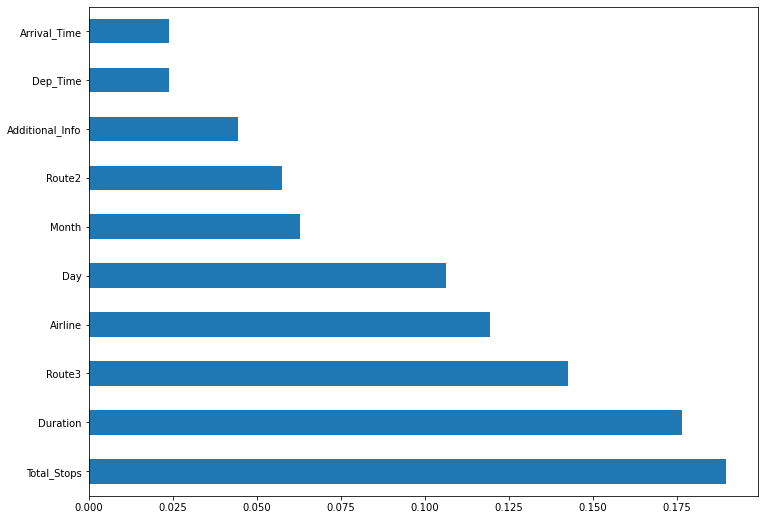

In [73]:
plt.figure(figsize=(12,9))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [74]:
X = X[["Total_Stops","Duration","Route3","Airline","Day","Month","Route2","Additional_Info","Dep_Time","Arrival_Time"]]

In [75]:
X

,Total_Stops,Duration,Route3,Airline,Day,Month,Route2,Additional_Info,Dep_Time,Arrival_Time
0,0.0,0.733755,21,3,24.0,3.0,10,8,22.0,1.0
1,2.0,2.289258,1,1,5.0,1.0,20,8,5.0,13.0
2,2.0,3.777380,4,4,6.0,9.0,27,8,9.0,4.0
3,1.0,1.839860,3,3,5.0,10.5,29,8,18.0,23.0
4,1.0,1.555111,7,3,3.0,1.0,29,8,16.0,21.0
...,...,...,...,...,...,...,...,...,...,...
10678,0.0,0.733755,21,0,4.0,9.0,5,8,19.0,22.0
10679,0.0,0.733755,21,1,27.0,4.0,5,8,20.0,23.0
10680,0.0,1.202939,21,4,27.0,4.0,10,8,8.0,11.0
10681,0.0,0.733755,21,10,3.0,1.0,10,8,11.0,14.0


In [76]:
def Best_model(pipe,X,y):
    Maximum_R2_score=0
    for random_state in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=random_state)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        R2_score=r2_score(y_test,y_pred)
        if R2_score>Maximum_R2_score:
            Maximum_R2_score=R2_score
            final_random_state=random_state
    print(f'At random state :-- {final_random_state}')
    print('Maximum r2 score is',  round(Maximum_R2_score ,4))
    print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
    print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
    print('Training accuracy',round(pipe.score(X_train,y_train),2))
    print('Test Accuracy',round(pipe.score(X_test,y_test),2))
    print('MAE',round(mean_absolute_error(y_test,y_pred),2))
    print('MSE',round(mean_squared_error(y_test,y_pred),2))
    print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

# LinearRegression

In [77]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = LinearRegression()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 90
Maximum r2 score is 0.5496
cross validation score 0.52
Standard Deviation 0.01
Training accuracy 0.52
Test Accuracy 0.51
MAE 2282.56
MSE 8988310.22
RMSE 2998.05


# Lasso

In [78]:
step1 = ColumnTransformer(transformers=[
    ("scale",MinMaxScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = Lasso()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 90
Maximum r2 score is 0.5496
cross validation score 0.52
Standard Deviation 0.01
Training accuracy 0.52
Test Accuracy 0.51
MAE 2283.08
MSE 8994894.52
RMSE 2999.15


# Ridge

In [79]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = Ridge()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 90
Maximum r2 score is 0.5496
cross validation score 0.52
Standard Deviation 0.01
Training accuracy 0.52
Test Accuracy 0.51
MAE 2282.56
MSE 8988359.18
RMSE 2998.06


# DecisionTreeRegressor

In [80]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = DecisionTreeRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 75
Maximum r2 score is 0.8773
cross validation score 0.85
Standard Deviation 0.01
Training accuracy 0.99
Test Accuracy 0.86
MAE 719.44
MSE 2589014.79
RMSE 1609.04


# RandomForestRegressor

In [81]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = RandomForestRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 52
Maximum r2 score is 0.924
cross validation score 0.91
Standard Deviation 0.01
Training accuracy 0.98
Test Accuracy 0.9
MAE 663.7
MSE 1820616.48
RMSE 1349.3


# KNeighborsRegressor

In [82]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = KNeighborsRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 53
Maximum r2 score is 0.7824
cross validation score 0.76
Standard Deviation 0.02
Training accuracy 0.85
Test Accuracy 0.73
MAE 1354.9
MSE 4927289.47
RMSE 2219.75


# GradientBoost

In [83]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = GradientBoostingRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 61
Maximum r2 score is 0.8658
cross validation score 0.84
Standard Deviation 0.01
Training accuracy 0.85
Test Accuracy 0.84
MAE 1198.96
MSE 2991639.09
RMSE 1729.64


# AdaBoostRegressor

In [84]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = AdaBoostRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 89
Maximum r2 score is 0.6685
cross validation score 0.62
Standard Deviation 0.02
Training accuracy 0.65
Test Accuracy 0.65
MAE 2080.07
MSE 6449027.89
RMSE 2539.49


# ExtraTreesRegressor

In [85]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = ExtraTreesRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 52
Maximum r2 score is 0.9181
cross validation score 0.9
Standard Deviation 0.01
Training accuracy 0.99
Test Accuracy 0.89
MAE 692.81
MSE 2028947.57
RMSE 1424.41


# VotingRegressor

In [86]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

Etc = ExtraTreesRegressor()
RF = RandomForestRegressor()
est = [("etc",Etc),("Rf",RF)]

step2 = VotingRegressor(estimators=est)
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])

Best_model(pipe,X,y)

At random state :-- 52
Maximum r2 score is 0.9244
cross validation score 0.91
Standard Deviation 0.01
Training accuracy 0.99
Test Accuracy 0.9
MAE 663.43
MSE 1834099.18
RMSE 1354.29


# Selecting Random forest as a best performing model

In [87]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = RandomForestRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])
for i in range(0,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    pipe.fit(X_train,y_train)
    print("at :",i)
    print(pipe.score(X_train,y_train))
    print(pipe.score(X_test,y_test))
    print()

at : 0
0.9791202831706333
0.9013820914662575

at : 1
0.9793040454465909
0.8971931765700797

at : 2
0.9781491679093766
0.8970599963226853

at : 3
0.9784241003475352
0.9065534100968171

at : 4
0.9772756555614186
0.914310698218551

at : 5
0.9783725056992268
0.894830202754665

at : 6
0.9778628724920491
0.8991824466920176

at : 7
0.9792433989741931
0.9020173222699113

at : 8
0.9784394853764375
0.9061374465651866

at : 9
0.9783653463449051
0.9062754739843587

at : 10
0.9777342311860824
0.907730075589837

at : 11
0.9773069201324025
0.9067455825365083

at : 12
0.9780698682024942
0.9043313672638305

at : 13
0.9791269143598367
0.8942743479850618

at : 14
0.9772226842849625
0.9215850426772225

at : 15
0.9775422942286499
0.90760266351176

at : 16
0.9782878641946589
0.9070307515103617

at : 17
0.978386614230488
0.9061355111720883

at : 18
0.9792874529106386
0.8978852528334644

at : 19
0.978986565352416
0.9074365134646835

at : 20
0.9780801758951129
0.9098958302866772

at : 21
0.9782958334531262
0.9

In [88]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = RandomForestRegressor()
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=52)
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
print()

0.9763406521591506
0.9229743307559961



In [89]:
params ={
    "step2__max_depth":np.arange(1,20),
    "step2__n_estimators":np.arange(100,500,100)
}

In [90]:
randomscv = RandomizedSearchCV(pipe , params,scoring='r2',n_jobs=-1,random_state=42)

In [91]:
randomscv.fit(X,y)

RandomizedSearchCV(estimator=Pipeline(steps=[('step1',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scale',
                                                                               StandardScaler(),
                                                                               slice(None, 11, None))])),
                                             ('step2',
                                              RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'step2__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'step2__n_estimators': array([100, 200, 300, 400])},
                   random_state=42, scoring='r2')

In [92]:
randomscv.best_params_

{'step2__n_estimators': 200, 'step2__max_depth': 14}

In [97]:
step1 = ColumnTransformer(transformers=[
    ("scale",StandardScaler(),slice(X.shape[1]+1))  
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,max_depth=14)
    
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=52)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)
print("Training score is ",r2_score(y_train_pred,y_train))
print("Testing score is ",r2_score(y_pred,y_test))
print('cross validation score',round(cross_val_score(pipe,X,y,scoring='r2').mean(),2))
print('Standard Deviation',round(cross_val_score(pipe,X,y,scoring='r2').std(),2))
print('MAE',round(mean_absolute_error(y_test,y_pred),2))
print('MSE',round(mean_squared_error(y_test,y_pred),2))
print('RMSE',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print()

Training score is  0.9593166817949685
Testing score is  0.9202988707844314
cross validation score 0.91
Standard Deviation 0.01
MAE 656.64
MSE 1343182.38
RMSE 1158.96



We are getting 92 % r2 score which is pretty much good and cross validation is also 91 which means our model is performing well.
so we are going to save the model

# Saving the model

In [98]:
import pickle

In [99]:
pickle.dump(pipe,open('Flight_price.pkl','wb'))

# Predictions

In [100]:
original_values  = np.array(y_test)
predicted_values = np.array(pipe.predict(X_test))
values = pd.DataFrame({'Original_values':original_values , 'predicted_values':predicted_values})

In [101]:
values

,Original_values,predicted_values
0,12681.0,12712.617359
1,8330.0,8070.286627
2,3943.0,4364.842150
3,10262.0,10314.287872
4,3943.0,4302.708648
...,...,...
2088,9483.0,10155.161458
2089,5073.0,6899.887073
2090,8586.0,8790.514775
2091,10262.0,11033.435888


# Test set

In [102]:
df2

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Route1,Route2,Route3,Route4,Route5
0,Jet Airways,Delhi,Cochin,17,4,10,1,No info,6,6,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,6,10,4,1,No info,5,12,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,19,19,23,1,In-flight meal not included,21,5,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,8,21,13,1,No info,21,5,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,23,2,2,0,No info,24,6,BLR,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,20,20,23,1,No info,6,6,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,14,16,2,0,No info,27,3,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,21,4,6,1,No info,3,6,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,4,19,15,1,No info,3,6,DEL,BOM,COK,None,None


In [104]:
num = []
cat=[]
for i in df2.columns:
    if df1[i].dtype == 'O':
        cat.append(i)   
    else:
        num.append(i)

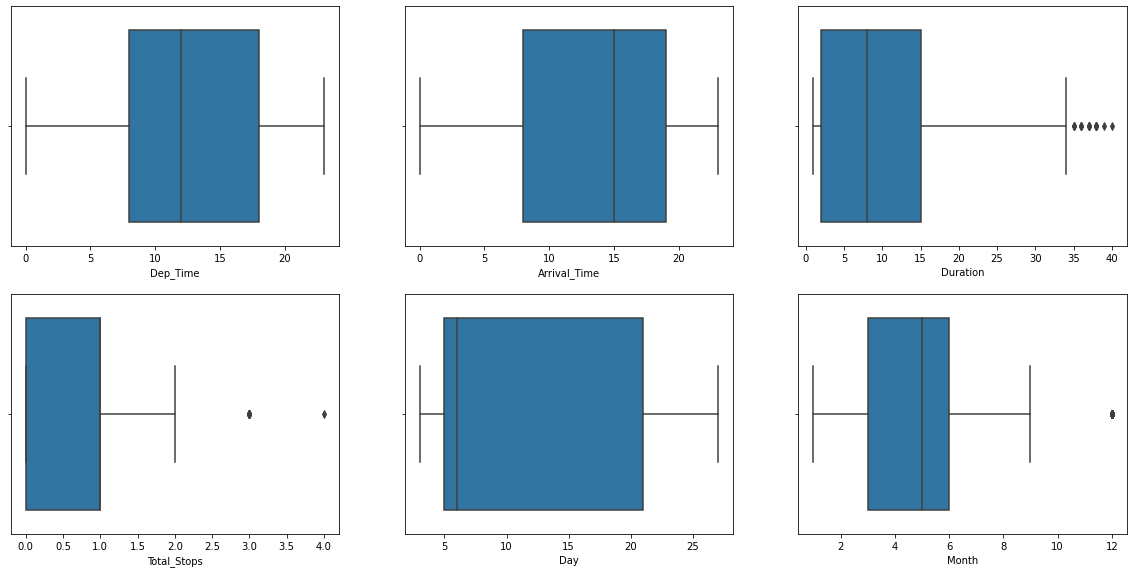

In [106]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(df2[j])
plt.show()

In [108]:
for i in num:
    IQR = df2[i].quantile(.75) - df2[i].quantile(.25) 
    upper = df2[i].quantile(.75) + 1.5 * IQR
    lower = df2[i].quantile(.25) - 1.5 * IQR
    df2[i] = np.where(df2[i]>upper,upper,np.where(df2[i]<lower,lower,df2[i]))

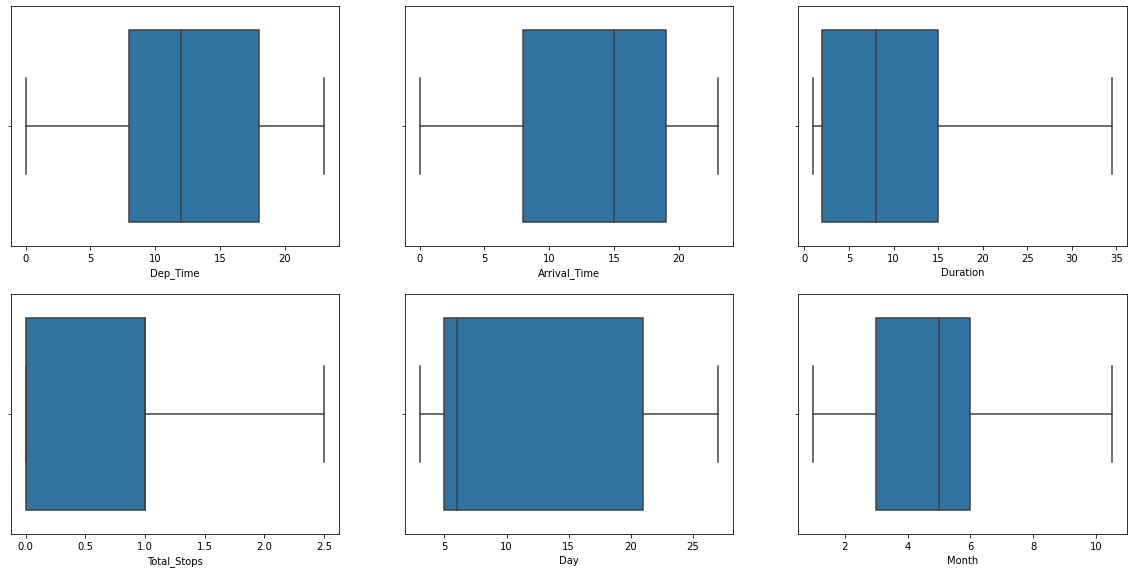

In [109]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
    plt.subplot(3,3,i+1)
    sns.boxplot(df2[j])
plt.show()

In [110]:
df2.skew()

Dep_Time        0.089146
Arrival_Time   -0.447350
Duration        0.857773
Total_Stops     0.237042
Day             0.479218
Month           0.288289
dtype: float64

In [111]:
le=LabelEncoder()
df2["Airline"]=le.fit_transform(df2["Airline"])
df2["Source"]=le.fit_transform(df2["Source"])
df2["Destination"]=le.fit_transform(df2["Destination"])
df2["Additional_Info"]=le.fit_transform(df2["Additional_Info"])
df2["Route1"]=le.fit_transform(df2["Route1"])
df2["Route2"]=le.fit_transform(df2["Route2"])
df2["Route3"]=le.fit_transform(df2["Route3"])
df2["Route4"]=le.fit_transform(df2["Route4"])
df2["Route5"]=le.fit_transform(df2["Route5"])
df2["Duration"],params = stats.boxcox(df2["Duration"]+0.00001) 

In [113]:
df2 = df2[["Total_Stops","Duration","Route3","Airline","Day","Month","Route2","Additional_Info","Dep_Time","Arrival_Time"]]

# Predictions

In [115]:
pipe.predict(df2)

array([10363.00391047,  4558.85      , 12862.93550312, ...,
       13957.42892857, 13388.93404586,  9634.57737029])